# DATA CLEANING

In [1]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================
import pandas as pd
import numpy as np

# Display settings (optional but professional)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

# ==============================
# 2. LOAD DATA
# ==============================
file_path = "/mnt/data/WA_Fn-UseC_-Telco-Customer-Churn (1).csv"
df = pd.read_csv(r"D:\SindhuSree\Desktop\power bi\tabuleau\telecom_churn\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

print("Initial Shape:", df.shape)
print(df.head())
print(df.info())
#-----------------------------------------------------------------------------------------------------------------------------------------------------
# ==============================
# 3. STANDARDIZE COLUMN NAMES
# ==============================
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# ==============================
# 4. REMOVE DUPLICATES
# ==============================
df.drop_duplicates(inplace=True)

# ==============================
# 5. HANDLE DATA TYPES
# ==============================
# totalcharges should be numeric but contains blanks
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

# ==============================
# 6. HANDLE MISSING VALUES
# ==============================
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Strategy:
# - totalcharges → median (numerical)
df['totalcharges'].fillna(df['totalcharges'].median(), inplace=True)

# ==============================
# 7. FIX INCONSISTENT VALUES
# ==============================
# Convert 'Yes'/'No' to consistent format
binary_cols = [
    'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn'
]

for col in binary_cols:
    df[col] = df[col].str.strip().str.capitalize()

# ==============================
# 8. CLEAN CATEGORICAL FEATURES
# ==============================
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].str.strip()

# ==============================
# 9. HANDLE OUTLIERS (OPTIONAL BUT REALISTIC)
# ==============================
# tenure outliers (business logic: tenure >= 0)
df = df[df['tenure'] >= 0]

# MonthlyCharges outlier handling using IQR
Q1 = df['monthlycharges'].quantile(0.25)
Q3 = df['monthlycharges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[
    (df['monthlycharges'] >= lower_bound) &
    (df['monthlycharges'] <= upper_bound)
]

# ==============================
# 10. FEATURE ENGINEERING (BASIC)
# ==============================
# Average monthly spend
df['avg_monthly_spend'] = df['totalcharges'] / (df['tenure'] + 1)

# ==============================
# 11. ENCODE TARGET VARIABLE
# ==============================
df['churn_flag'] = df['churn'].map({'Yes': 1, 'No': 0})

# ==============================
# 12. FINAL VALIDATION
# ==============================
print("\nFinal Shape:", df.shape)
print(df.isnull().sum())
print(df.head())
print(df.info())

# ==============================
# 13. SAVE CLEAN DATA
# ==============================
df.to_csv("/mnt/data/telco_churn_cleaned.csv", index=False)

print("\n✅ Data cleaning completed and file saved as telco_churn_cleaned.csv")


Initial Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No   
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No   
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No   
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          N

C:\Users\likit\AppData\Local\Temp\ipykernel_1676\2754585486.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['totalcharges'].fillna(df['totalcharges'].median(), inplace=True)


OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [ ]:
EDA

In [8]:
# ===============================
# 1. Import Required Libraries
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')

# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv(r"D:\SindhuSree\Desktop\power bi\tabuleau\telecom_churn\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

# ===============================
# 3. Basic Data Understanding
# ===============================

print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns)

df.head()



Shape of dataset: (7043, 21)

Column Names:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# ===============================
# 4. Data Types & Missing Values
# ===============================

df.info()

print("\nMissing Values:\n")
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_num           0
dtype: int64

In [2]:
import os


print(os.getcwd())

D:\END_TO_END_PROJECT


In [24]:
# ===============================
# Fix TotalCharges Properly
# ===============================

# 1. Strip spaces (handle blank strings)
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip()

# 2. Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Check missing values
print("Missing TotalCharges:", df['TotalCharges'].isna().sum())

# 4. Fill missing with median (NO inplace)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# 5. Final check
print("After fill Missing TotalCharges:", df['TotalCharges'].isna().sum())


Missing TotalCharges: 0
After fill Missing TotalCharges: 0


Churn
No     5174
Yes    1869
Name: count, dtype: int64


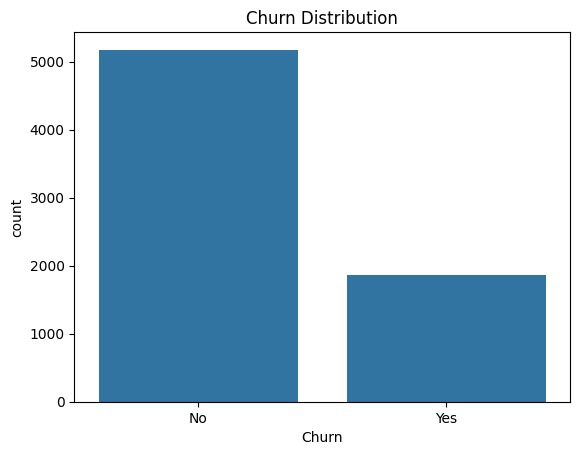

In [16]:
# ===============================
# 6. Target Variable Distribution
# ===============================

churn_counts = df['Churn'].value_counts()
print(churn_counts)

plt.figure()
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [17]:
# ===============================
# 7. Numerical Features Summary
# ===============================

df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


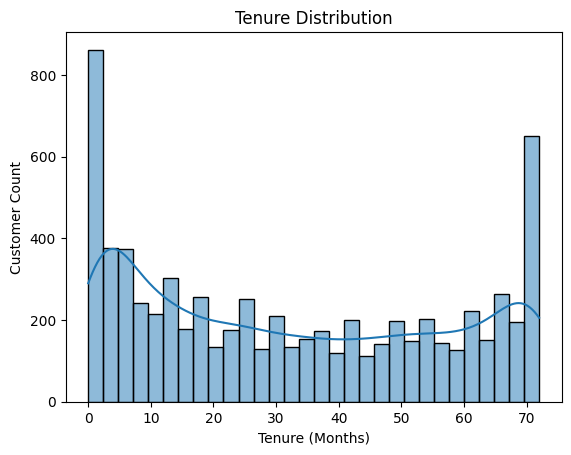

In [18]:
# ===============================
# 8. Tenure Distribution
# ===============================

plt.figure()
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Customer Count")
plt.show()


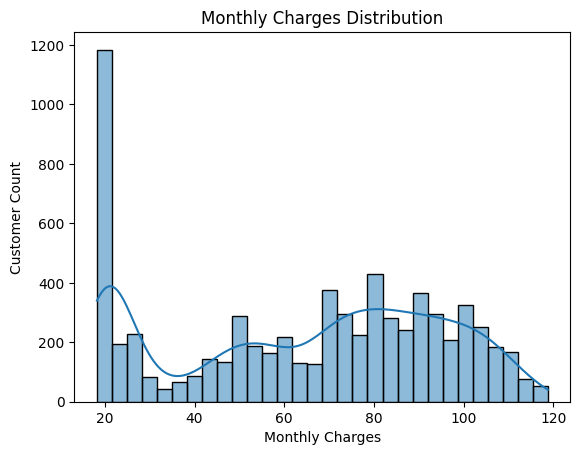

In [19]:
# ===============================
# 9. Monthly Charges Distribution
# ===============================

plt.figure()
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Customer Count")
plt.show()


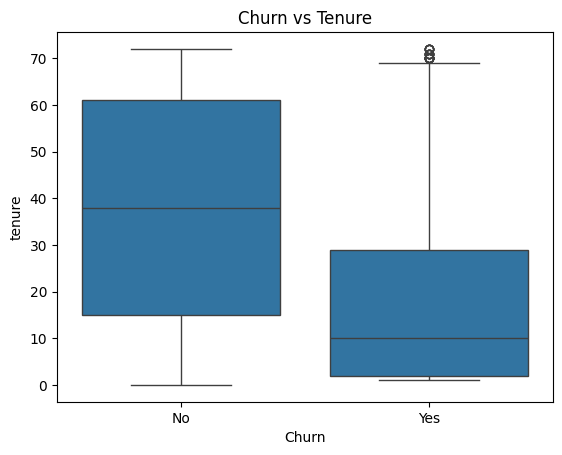

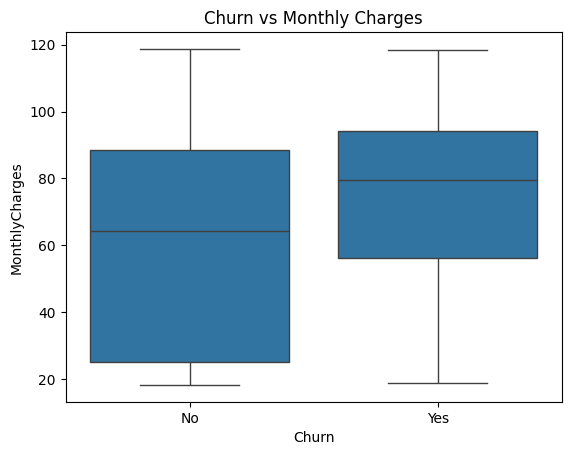

In [20]:
# ===============================
# 10. Churn vs Numerical Variables
# ===============================

plt.figure()
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Churn vs Tenure")
plt.show()

plt.figure()
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Churn vs Monthly Charges")
plt.show()


In [21]:
# ===============================
# 11. Categorical Variable Analysis
# ===============================

categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categorical_cols:
    print("\n", col)
    print(df[col].value_counts())



 gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

 SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

 Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

 Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

 PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

 MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

 InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

 OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

 OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

 DeviceProtection
DeviceProtection
No                     3095
Yes                    2422
No intern

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


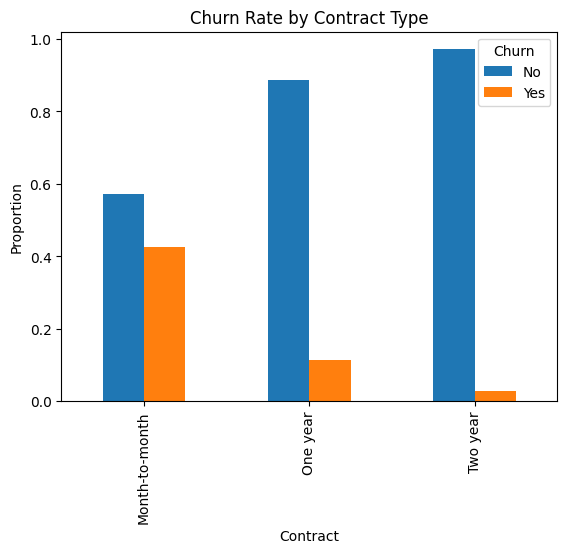

In [22]:
# ===============================
# 12. Churn Rate by Contract Type
# ===============================

contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
print(contract_churn)

contract_churn.plot(kind='bar')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.show()


Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


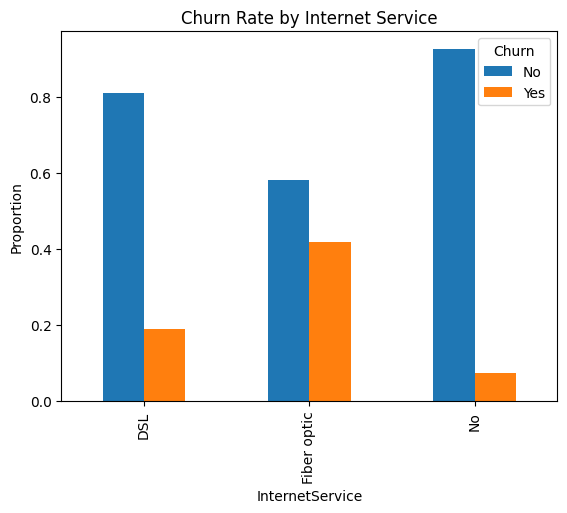

In [23]:
# ===============================
# 13. Churn Rate by Internet Service
# ===============================

internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index')
print(internet_churn)

internet_churn.plot(kind='bar')
plt.title("Churn Rate by Internet Service")
plt.ylabel("Proportion")
plt.show()


In [25]:
# ===============================
# FINAL NUMERIC CLEANING (MANDATORY)
# ===============================

# Force-clean TotalCharges again
df['TotalCharges'] = df['TotalCharges'].astype(str).str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Double check
print("Missing TotalCharges:", df['TotalCharges'].isna().sum())

# Fill missing
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Make sure other numeric columns are numeric
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

# Final sanity check
print(df[['tenure','MonthlyCharges','TotalCharges']].dtypes)


Missing TotalCharges: 0
tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object


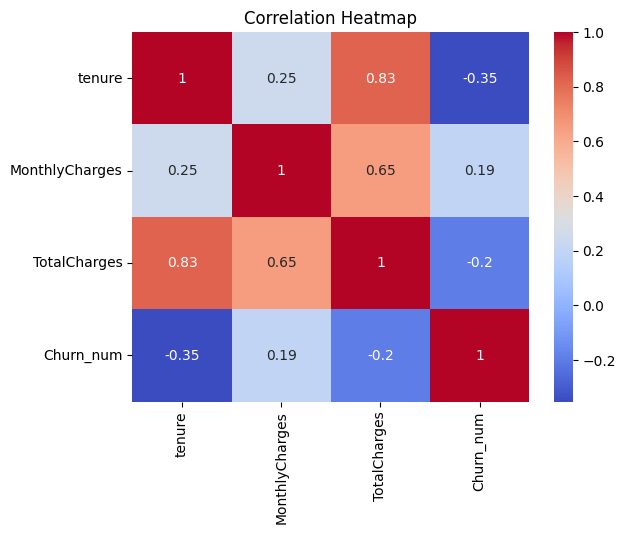

In [26]:
# ===============================
# Correlation Analysis (CLEAN)
# ===============================

df['Churn_num'] = df['Churn'].map({'Yes':1, 'No':0})

corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_num']].astype(float).corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# ===============================
# 15. Key Business Insights (Print)
# ===============================

print("Key Observations:")
print("- Customers with low tenure churn more")
print("- Month-to-month contracts have highest churn")
print("- Higher monthly charges show higher churn tendency")
print("- Fiber optic internet users churn more than DSL")
print("- Long-term contracts reduce churn significantly")


Key Observations:
- Customers with low tenure churn more
- Month-to-month contracts have highest churn
- Higher monthly charges show higher churn tendency
- Fiber optic internet users churn more than DSL
- Long-term contracts reduce churn significantly


In [3]:
df.to_csv(r"D:\END_TO_END_PROJECT\telco_churn_cleaned.csv", index=False)

print("Saved at D:\\END_TO_END_PROJECT\\telco_churn_cleaned.csv")

Saved at D:\END_TO_END_PROJECT\telco_churn_cleaned.csv


In [4]:
import os

print(os.listdir(r"D:\END_TO_END_PROJECT"))

['.ipynb_checkpoints', 'DATA_CLEANING.ipynb', 'Roadmap.ipynb', 'telco_churn_cleaned.csv', 'Untitled.ipynb']
